# Predicting the Sale Price of Bulldozers using Machine Learning

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Timestamp
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-07-20 11:22:56.515821


In [3]:
df=pd.read_csv("TrainAndValid.csv",
              low_memory=False, # set low_memory=False to prevent mixed data types warning 
                 parse_dates=["saledate"]) # can use the parse_dates parameter and specify which column to treat as a date column)

In [4]:
df.head(10) , df.tail(10)


(   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
 0  1139246    66000.0     999089     3157         121           3.0      2004   
 1  1139248    57000.0     117657       77         121           3.0      1996   
 2  1139249    10000.0     434808     7009         121           3.0      2001   
 3  1139251    38500.0    1026470      332         121           3.0      2001   
 4  1139253    11000.0    1057373    17311         121           3.0      2007   
 5  1139255    26500.0    1001274     4605         121           3.0      2004   
 6  1139256    21000.0     772701     1937         121           3.0      1993   
 7  1139261    27000.0     902002     3539         121           3.0      2001   
 8  1139272    21500.0    1036251    36003         121           3.0      2008   
 9  1139275    65000.0    1016474     3883         121           3.0      1000   
 
    MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
 0            

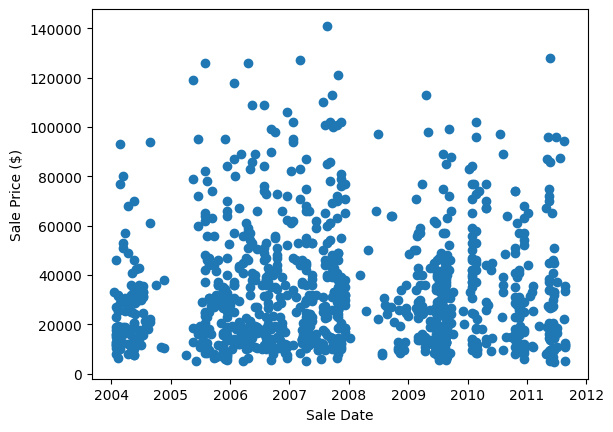

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

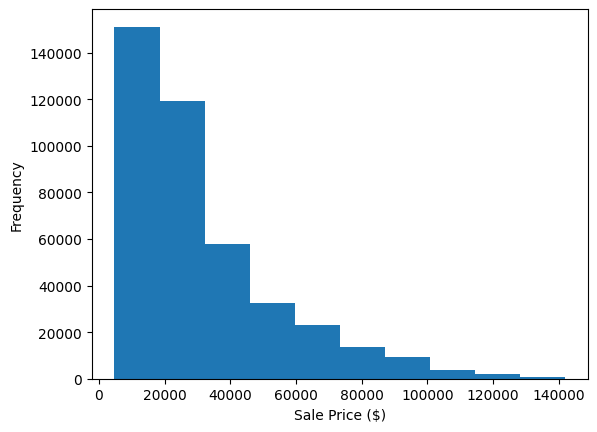

In [6]:
# View SalePrice distribution 
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [8]:
df.index

RangeIndex(start=0, stop=412698, step=1)

In [9]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saledate
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,412698
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,2004-10-19 01:54:17.182733952
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989-01-17 00:00:00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000-12-06 00:00:00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006-06-28 00:00:00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,2009-05-28 00:00:00
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,2012-04-28 00:00:00
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN


In [10]:
df.isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412694,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412695,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412696,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True


In [11]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [12]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

# Adding extra features to our DataFrame

In [13]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [14]:
# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [15]:
# View newly created columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


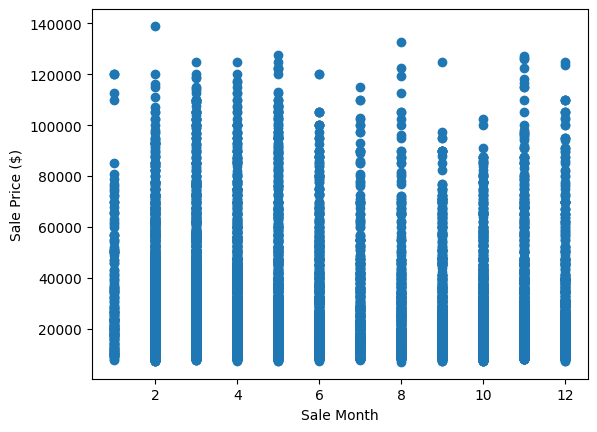

In [16]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()
ax.scatter(x=df_tmp["saleMonth"][:10000], # visualize the first 10000 values
           y=df_tmp["SalePrice"][:10000])
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)");

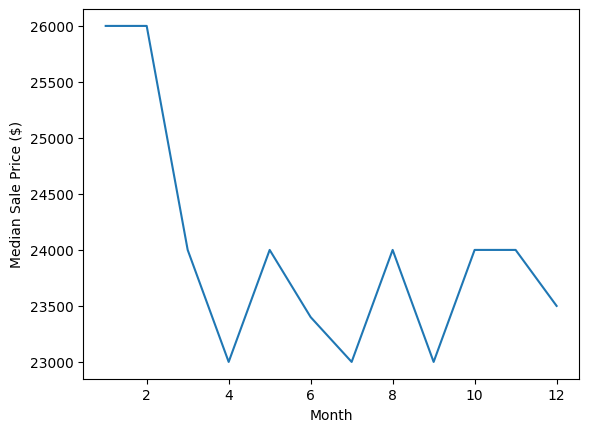

In [17]:
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");

In [18]:
# Check the different values of different columns
df_tmp.state.value_counts()[:10]

state
Florida        67320
Texas          53110
California     29761
Washington     16222
Georgia        14633
Maryland       13322
Mississippi    13240
Ohio           12369
Illinois       11540
Colorado       11529
Name: count, dtype: int64

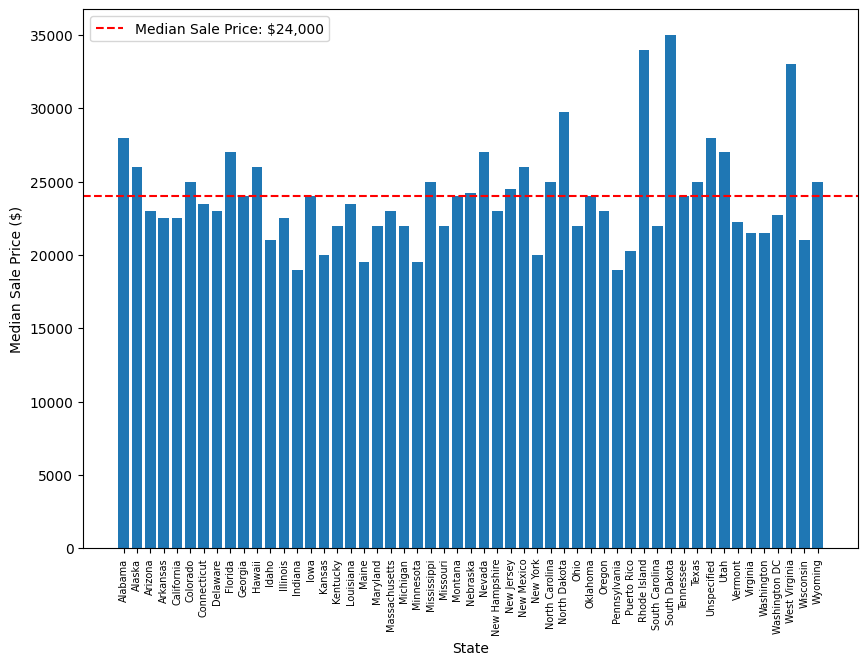

In [19]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

In [20]:
# Check for missing values and different datatypes 
df_tmp.info();

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [21]:
# Check for total missing values per column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [22]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items(): 
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")
        

In [23]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [24]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [25]:
# Inspect the category codes
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

# Filling missing numerical values

In [26]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [27]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
236510,1736258,70000.0,1540077,375,132,1.0,2002,0.0,NaN,PC200-7,...,NaN,NaN,NaN,2005,3,30,2,89,0,1
107495,1437538,54000.0,476129,1276,132,1.0,1993,0.0,NaN,330L,...,NaN,NaN,NaN,2003,3,19,2,78,0,1
117831,1456410,22000.0,1127958,4147,132,1.0,1978,0.0,NaN,D8K,...,None or Unspecified,NaN,NaN,1999,12,2,3,336,0,1
124059,1468593,22000.0,1214437,4200,132,5.0,1992,0.0,NaN,E120B,...,NaN,NaN,NaN,2002,4,20,5,110,0,1
79796,1375198,69000.0,1129987,3414,132,1.0,1987,0.0,NaN,235B,...,NaN,NaN,NaN,1993,3,11,3,70,0,1


In [28]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {} 

# 2. Turn categorical variables into numbers
for label, content in df_tmp.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        
        # 7. Set the column to the numerical values (the category code value) 
        df_tmp[label] = content_category_codes   

In [29]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Woohoo! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Woohoo! Let's build a model!


# Fitting a machine learning model to our preprocessed data

In [30]:
#Splitting data into train/valid sets
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,1,1,1,1,1,0,0,0,1,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,1,1,1,1,1,1,1,1,0,0
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,1,1,1,1,1,0,0,0,1,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,1,1,1,1,1,1,1,1,0,0
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,1,1,1,1,1,0,0,0,1,1


In [31]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [32]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [33]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# Evaluation function

In [34]:
from sklearn.ensemble import RandomForestRegressor
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# TK - can now use RMSLE from sckit-learn, see: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_log_error.html#sklearn.metrics.root_mean_squared_log_error 
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [35]:
len(X_train)

401125

In [36]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=10000)

# Fitting a machine learning model to our preprocessed data

In [37]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
show_scores(model)

{'Training MAE': 5550.330506350887,
 'Valid MAE': 7097.186052017628,
 'Training RMSLE': 0.25738641690756275,
 'Valid RMSLE': 0.29057494781513415,
 'Training R^2': 0.8611831708109563,
 'Valid R^2': 0.8359302937821945}

# Hyperparameter tuning with RandomizedSearchCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestRegressor()
,param_distributions,"{'max_depth': [None, 3, ...], 'max_features': [0.5, 1.0, ...], 'max_samples': [10000], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), ...}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [40]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 12,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 1.0,
 'max_depth': None}

In [41]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6049.652333064695,
 'Valid MAE': 7568.270754849008,
 'Training RMSLE': 0.27554454469841166,
 'Valid RMSLE': 0.3049076734400777,
 'Training R^2': 0.8337124738630454,
 'Valid R^2': 0.806689957497938}

In [42]:
# Train a model with the best parameters
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

,n_estimators,90
,criterion,'squared_error'
,max_depth,None
,min_samples_split,14
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
show_scores(ideal_model)

{'Training MAE': 2930.107416701243,
 'Valid MAE': 5910.764537443854,
 'Training RMSLE': 0.1435110165944225,
 'Valid RMSLE': 0.24384931690249653,
 'Training R^2': 0.9595787298096076,
 'Valid R^2': 0.8836385817536038}

In [44]:
# Make prediction on test data
df_test = pd.read_csv("Test.csv",
                      parse_dates=["saledate"])
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [45]:
# Preprocess the Test data

def preprocess_data(df):
    # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [46]:
f_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [47]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [48]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [49]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [51]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

In [52]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [53]:
# Create DataFrame compatible with Kaggle submission requirements
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17287.407898
1,1227844,18238.780661
2,1227847,49598.751565
3,1227848,67166.432379
4,1227863,57989.445528
...,...,...
12452,6643171,38661.758041
12453,6643173,11895.633970
12454,6643184,13325.289456
12455,6643186,16837.297925


# Feature Importance

In [54]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.35763386e-02, 2.00412531e-02, 4.39424160e-02, 1.76794268e-03,
       3.33187693e-03, 2.01259492e-01, 3.21705376e-03, 1.04119526e-03,
       3.65719973e-02, 4.70828717e-02, 6.38724546e-02, 4.77291860e-03,
       1.95774755e-02, 1.53479072e-01, 4.67529745e-02, 6.01602553e-03,
       3.31393746e-03, 1.89330155e-03, 3.46935908e-03, 6.81828984e-02,
       4.16273954e-04, 8.14216499e-05, 9.03867913e-04, 2.14144090e-04,
       1.14335709e-03, 2.66481512e-05, 2.06390313e-03, 8.70453268e-03,
       2.32263334e-03, 2.18269527e-03, 2.74564206e-03, 1.82178943e-03,
       3.29645432e-03, 1.88731329e-03, 2.51251932e-03, 9.52586502e-03,
       8.83977190e-04, 1.52572548e-02, 2.01025767e-03, 1.47614466e-03,
       1.27182935e-03, 8.92558313e-04, 1.51303399e-03, 6.25423844e-04,
       6.45765027e-04, 4.41225022e-04, 2.67936951e-04, 2.40880501e-03,
       1.13331318e-03, 3.07866287e-04, 4.30034173e-04, 7.27472959e-02,
       3.81599966e-03, 5.68264156e-03, 2.91094387e-03, 9.80619364e-03,
      

In [55]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

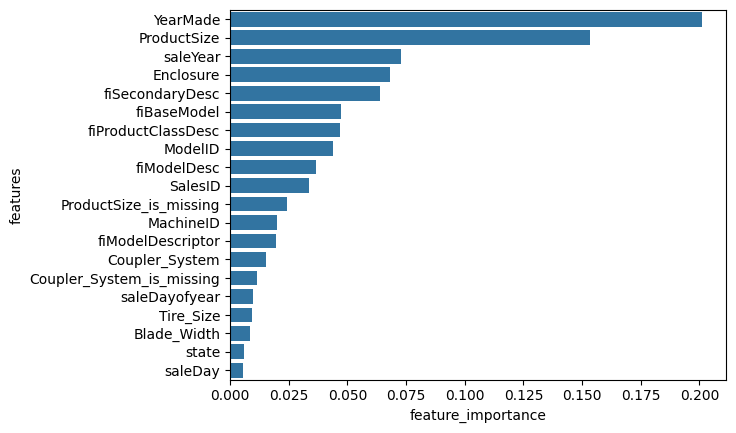

In [56]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [57]:
sum(ideal_model.feature_importances_)

1.0